# Image Restoration using Constrained Matrix Inversion

In [1]:
import numpy as np
import math
from PIL import Image
from scipy import fftpack as fftp
import cmath
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def return_degraded_image():
    img = Image.open('cameraman.tif').convert('L')
    img.load()
    data = np.asarray( img, dtype="float64" )
    
    image_fft=fftp.fft2(data)
    a=.1
    b=.1
    T=1 
    H=np.zeros((256,256),dtype="complex")
    
    for u in range(1,257):
        for v in range(1,257):
            den=math.pi*(u*a+v*b)
            #print(den)
            temp=math.sin(den)
            complexno=1j
            exponent=cmath.exp((-complexno)*den)
            num=T*temp*exponent
            #num=complex(numerator)
            H[u-1,v-1]=num/den
    final_image2=image_fft*H
    image2=np.fft.ifft2(final_image2)   
    plt.imsave('degraded.png',image2.real, cmap='gray')
    print('Degraded Cameraman - Motion Blur')
    plt.figure()
    plt.imshow(Image.fromarray(image2.real),cmap='gray')
    return [image2,H]

Original Cameraman


C:\Users\RAGJA\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Degraded Cameraman - Motion Blur


C:\Users\RAGJA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Cameraman restored via Constrained Matrix Inversion


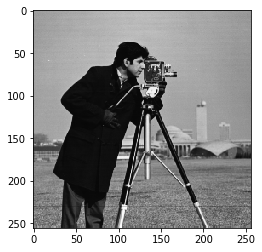

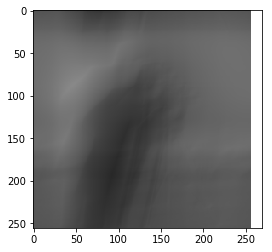

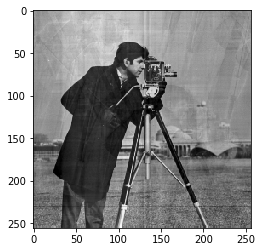

In [3]:
def get_mean_avg_val_imge():
    img = plt.imread('degraded.png')     
    img=img.flatten()
    #plt.figure()
    cdf, bins, patch=plt.hist(img, bins=256, range=(0,256), normed=True, cumulative=False)
    grey_levels=np.arange(0,256,1)
    #print(grey_levels)
    uL=np.dot(grey_levels,cdf)
    theta=np.sum(cdf)
    u=uL/theta
    return u
def get_image():
    img = Image.open('cameraman.tif').convert('L')      
    img.load()
    I = np.asarray( img, dtype="uint8")
    print('Original Cameraman')
    plt.figure()
    plt.imshow(Image.fromarray(I),cmap='gray')
    data=I
    l_2 = np.zeros((256,256))
    N=256
    pi=math.pi
    for n in range(0,data.shape[1]):
        t1=1/N**4
        t2=(N-5)**2
        t3=2*(N-5)*math.cos(2*pi*n/N)
        t4=2*(N-5)*math.cos(2*pi*n*(N-1)/N)
        t5=2*math.cos((2*pi*(N-2)*n)/N)
        l_2[0,n]=(t1*(t2+t3+t4+t5))
    for m in range(1,data.shape[0]):
        for n in range(0,data.shape[1]):
            l_2[m,n]=(1/N**4)*(25+2-(10*math.cos(2*math.pi*n/N)-10*math.cos((2*math.pi*(N-1)*n)/N)+2*math.cos((2*math.pi*(N-2)*n)/N)))
    gamma=10*30
    temp2=gamma*l_2
    list=return_degraded_image()
    g=list[0]
    H=list[1]
    u=get_mean_avg_val_imge()  
    G=fftp.fft2(g)
    temp=abs(H)**2
    M_temp=temp/(temp+temp2)
    M=M_temp/H
    F=G*M
    f=fftp.ifft2(F)
    f=f.real
    f=f+u*(10**-31)
    plt.imsave('restored_cameraman.png',f,cmap='gray')
    print('Cameraman restored via Constrained Matrix Inversion')
    plt.figure()
    plt.imshow(Image.fromarray(f),cmap='gray')
get_image()